# Fundamentals of Machine Learning - Exercise 3
* Goal of the excercise is to learn about more advanced vizualization techniques.


![meme1](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_03_meme_02.jpg?raw=true)


## We will use House prices dataset once more

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import packages

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 🔎 What does the *...* in the middle of table columns mean?

### 💡 Hint: If the dataset has too many columns, it is good to set pandas parameter **display.max_columns** to None so there is no such limit

In [4]:
with pd.option_context('display.max_columns', None):
    display(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

# Let's start with the plots already!

# 📊 Pairplot
* Plot pairwise relationships in a dataset
    * i.e. **Scatterplots for multiple pairs of numerical attributes**
    * See [this](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for more details

## Select only interesting features for pairplot visualization
* 💡 The pairplot might be too big to see anything in the visualization otherwise
* Select just subset of features and use *vars* parameter for it

> ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

In [7]:
selected_cols = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

In [ ]:
sns.pairplot(data=df, vars=selected_cols)

## 💡 Notice that both OverallQual and OverallCond columns are rather categorical features
* Even though they are represented by numerical values
    * So one would expect that the features are numerical, but they aren't

* Scatter plot may not be the best way to visualize this type of data
    * 🔎 What type of plot is more reseonable?

* Let's select only appropropriate features this time
* Also distinguish among different **BldgType** in the plot
    * *hue* parameter

> ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

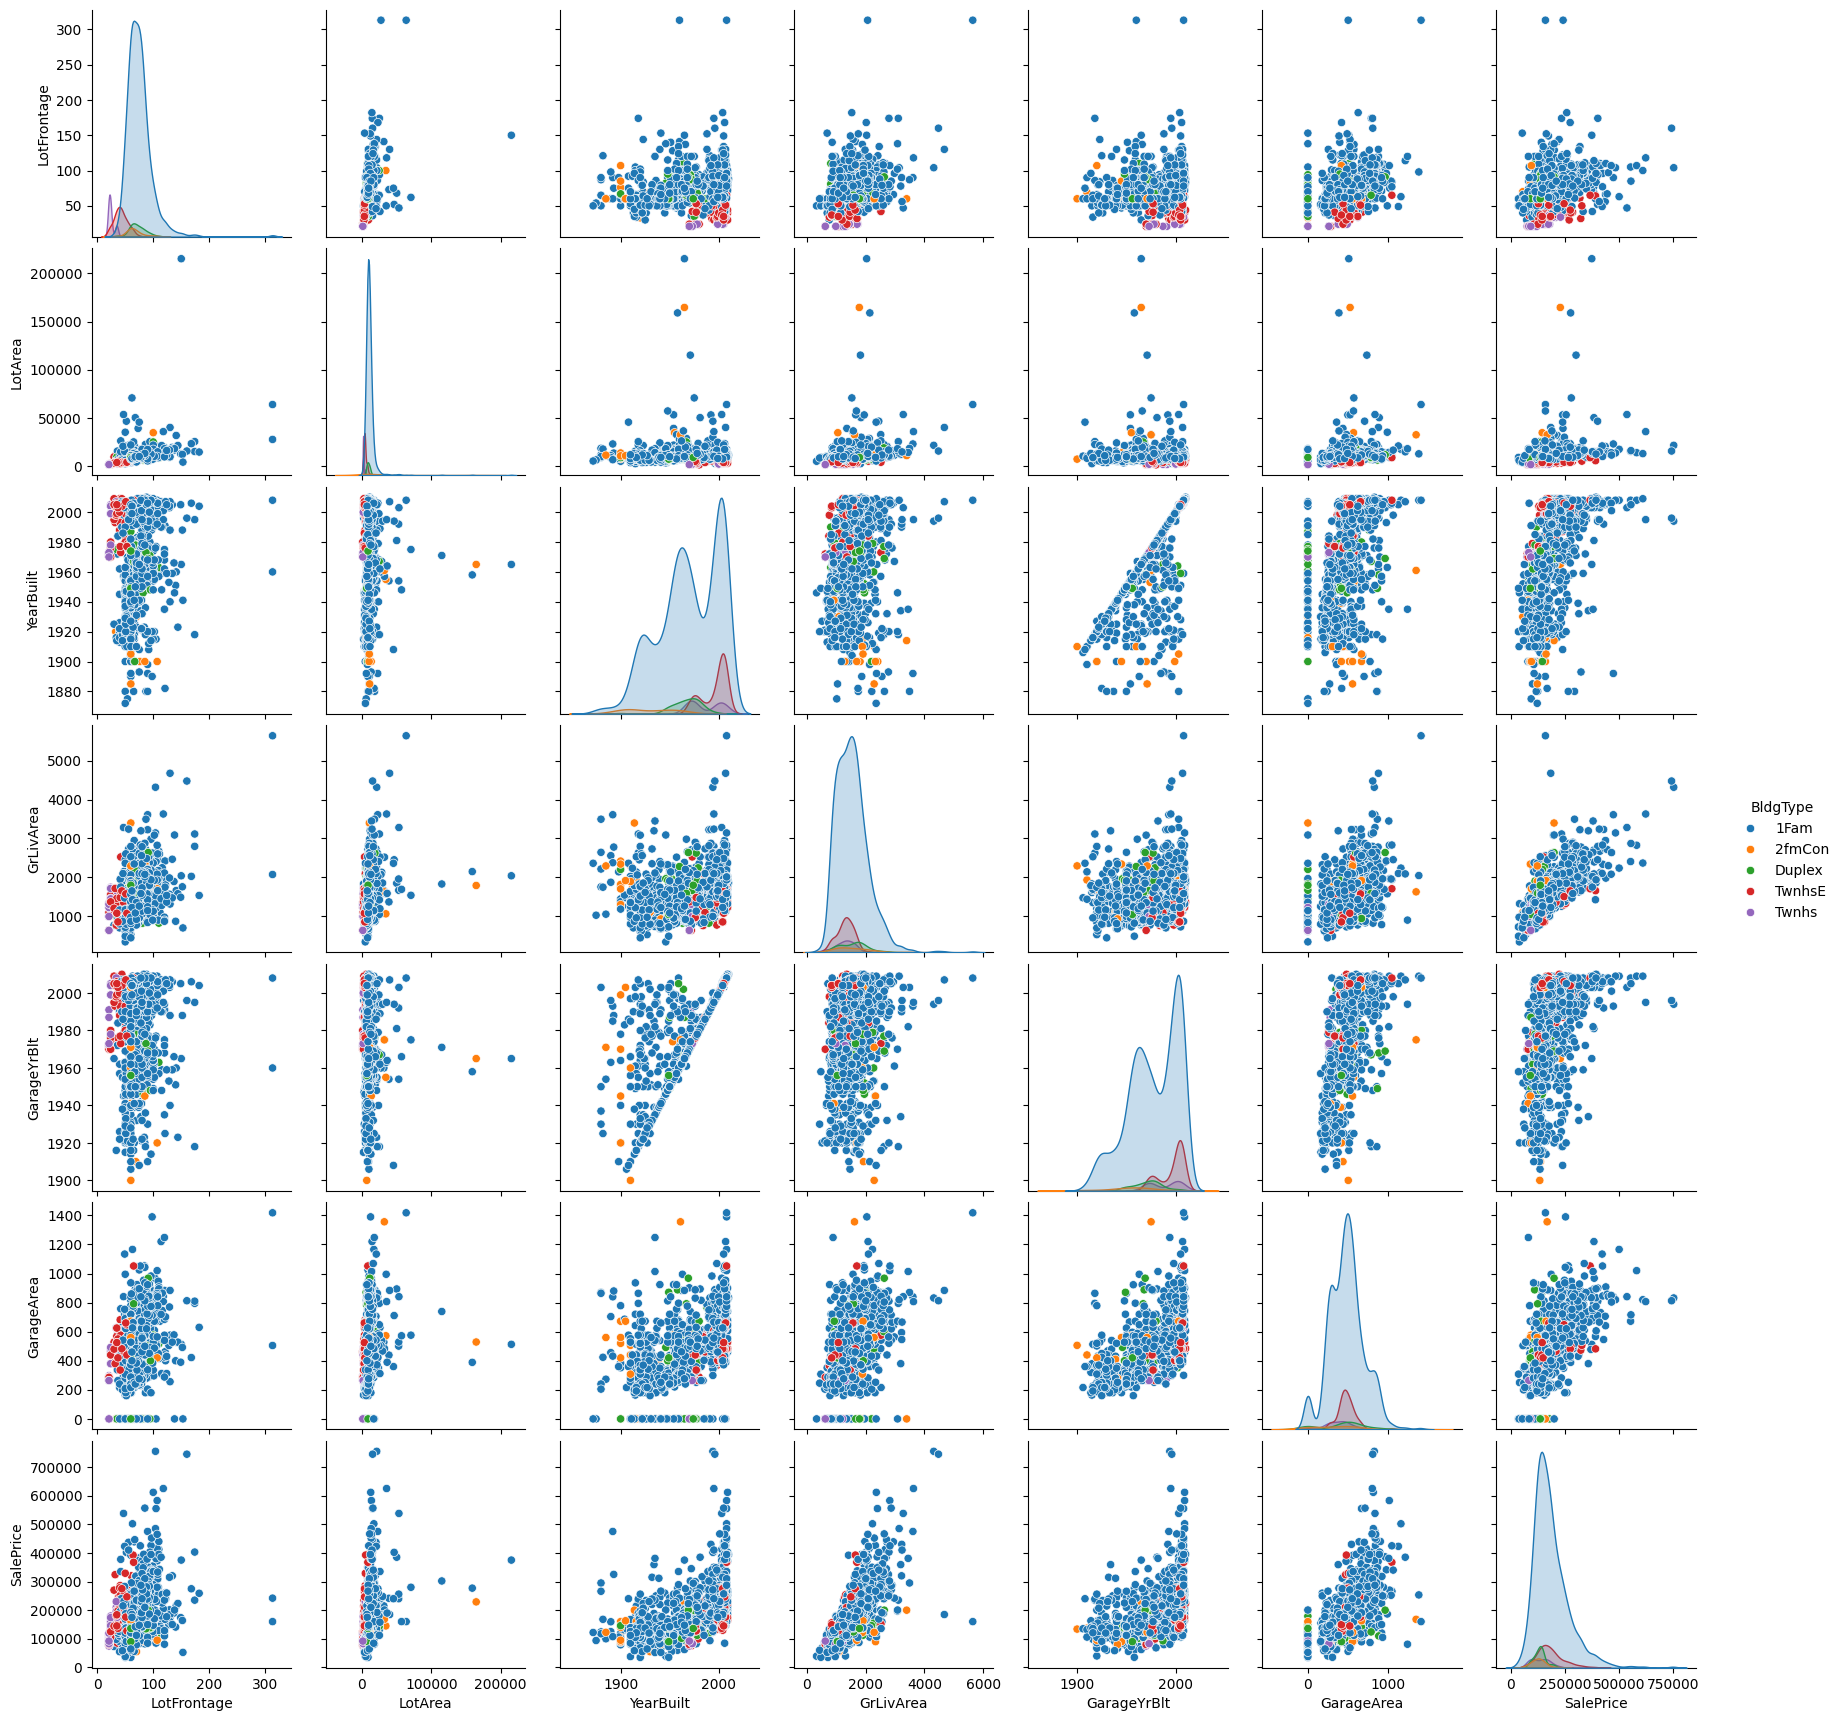

In [9]:
s_cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

sns.pairplot(data=df, vars=s_cols, hue="BldgType")

## In the following steps we want to threat OverallQual and OverallCond as categories instead of numbers
* for modifying of column's types you can use function *astype*

In [22]:
print(df.OverallQual.dtype)
# df['OverallQual'] = df['OverallQual'].astype = 'str'

# df['OverallCond'] = df['OverallCond'].astype = 'str'

df.OverallCond = df.OverallCond.astype = 'str'
df.OverallQual = df.OverallQual.astype = 'str'

object


# 🔎 Are you able to say which categorical attributes affect the price right now?
- Yeah... me neither so let's find out by plotting the data first 🙂

## Start with a selection of only the categorical features
* Use *select_dtypes* function with *exclude* parameter to get rid of numerical (*np.number*) attributes
    * Save these column names into a variable
* Loop over the selected columns and fill *NaN* values with **'MISSING'** string

In [26]:
qual_columns = df.select_dtypes(exclude=np.number).columns
qual_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
for col in qual_columns:
  if df[col].isna().any():
    df[col] = df[col].fillna('Missing')

## Check the result

In [29]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


![meme2](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_03_meme_01.jpg?raw=true)

# 📊 Very useful feature is the [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function
* It is useful for defining our own grids for plots based on our needs

## We will plot boxplots of *SalePrice* along with the value counts using barplot for each categorical feature
* **🔎 Why is this pair of plots useful?**

* The *subplots* function has 3 important parameters
    1. Number of rows - *nrows*
    2. Number of columns - *ncols*
    3. Figure size - *figsize*
* It returns a *figure* and *axes* objects
    * The *axes* contains reference to individual subplots
    * 💡 Use *flat* property to access 1D array of subplots

/tmp/ipython-input-295075741.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
/tmp/ipython-input-295075741.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_right.set_xticklabels(ax_right.xaxis.get_majorticklabels(), rotation=60)
/tmp/ipython-input-295075741.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
/tmp/ipython-input-295075741.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_right.set_xticklabels(ax_right.xaxis.get_majorticklabels(), rotation=60)
/tmp/ipython-input-295075741.py:7: UserW

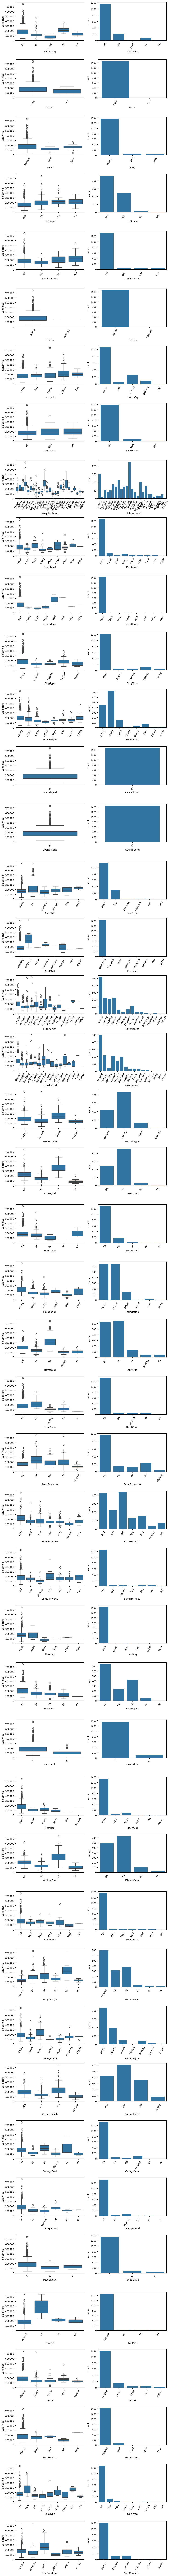

In [30]:
fig, axes = plt.subplots(len(qual_columns), 2, figsize=(10, 150))

for i, col in enumerate(qual_columns):
    ax_left = axes.flat[2*i]
    ax_right = axes.flat[2*i + 1]
    sns.boxplot(data=df, x=col, y='SalePrice', ax=ax_left)
    ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
    sns.countplot(data=df, x=col, ax=ax_right)
    ax_right.set_xticklabels(ax_right.xaxis.get_majorticklabels(), rotation=60)

fig.tight_layout()

# 📊 Correlation
* 🔎 What does the *correlation coefficient* tell you?
* What is the range of it?
* Is it useful for each type of relationship?
* 💡 **Correlation is not causation**
    * e.g. Ice cream sales X Number of thefts

- Take a look at [this link](https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/)
- See also [this](https://www.simplypsychology.org/correlation.html) or [this](https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp) for some more info about the topic

## We can compute the correlation matrix using *corr()* function
* Select columns first

> ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

In [33]:
selected_cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

corr_matrix = df[selected_cols].corr()

corr_matrix

,LotFrontage,LotArea,YearBuilt,GrLivArea,GarageYrBlt,GarageArea,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.402797,0.070250,0.344997,0.351799
LotArea,0.426095,1.000000,0.014228,0.263116,-0.024947,0.180403,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.199010,0.825667,0.478954,0.522897
GrLivArea,0.402797,0.263116,0.199010,1.000000,0.231197,0.468997,0.708624
GarageYrBlt,0.070250,-0.024947,0.825667,0.231197,1.000000,0.564567,0.486362
GarageArea,0.344997,0.180403,0.478954,0.468997,0.564567,1.000000,0.623431
SalePrice,0.351799,0.263843,0.522897,0.708624,0.486362,0.623431,1.000000


## 📊 Vizualize the matrix using *heatmap* plot

<Axes: >

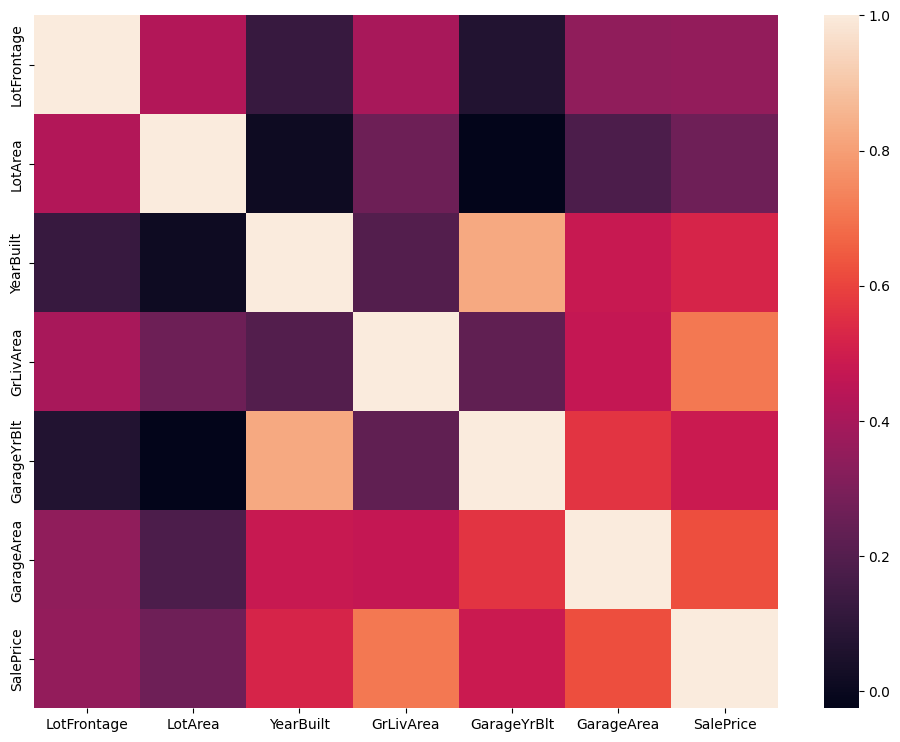

In [34]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix)

## Which color scheme will be more appropropriate for corellation representation?
- Change color map *cmap* (e.g. RdYlGn)
- Set limits to adjust color map values from -1 to 1
    - Attributes *vmin*, *vmax*

<Axes: >

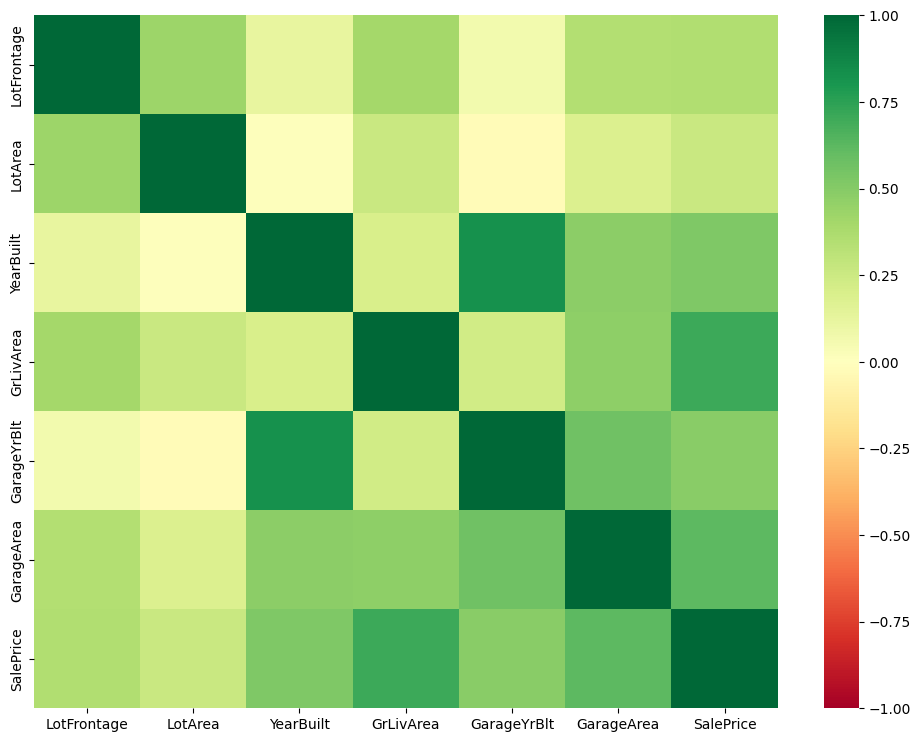

In [36]:
plt.figure(figsize=(12, 9))

sns.heatmap(corr_matrix, cmap='RdYlGn', vmin=-1, vmax=1)

## Add values to the heatmap and amplify heatmap's readability
* Use *cmap=sns.light_palette("seagreen", as_cmap=True)* color map
* Set minimum value to **0.3**
* Enable annotations using *annot* parameter
* Plot each column as a *square* (same name of the parameter)

<Axes: >

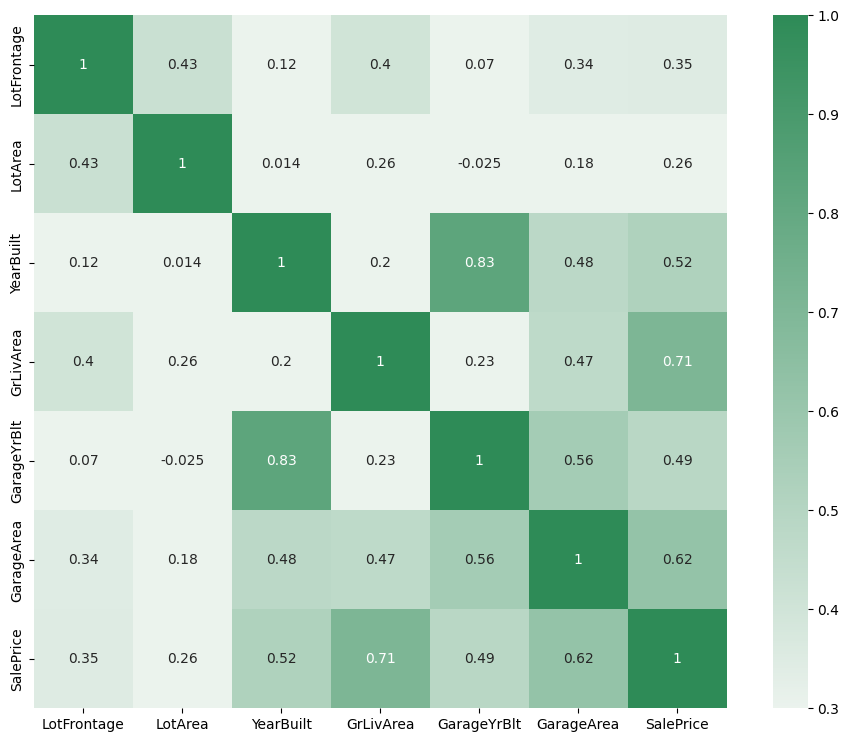

In [38]:
plt.figure(figsize=(12, 9))

sns.heatmap(corr_matrix, cmap=sns.light_palette("seagreen", as_cmap=True), vmin=0.3, annot=True, square=True)

# 💡 I highly recommend taking a look at the plot gallery for some more plots!
* https://seaborn.pydata.org/api.html

## 📊 Let's try for example scatter plot with regression line fron the example gallery
* 🔎 What insight does it give us about the trend?

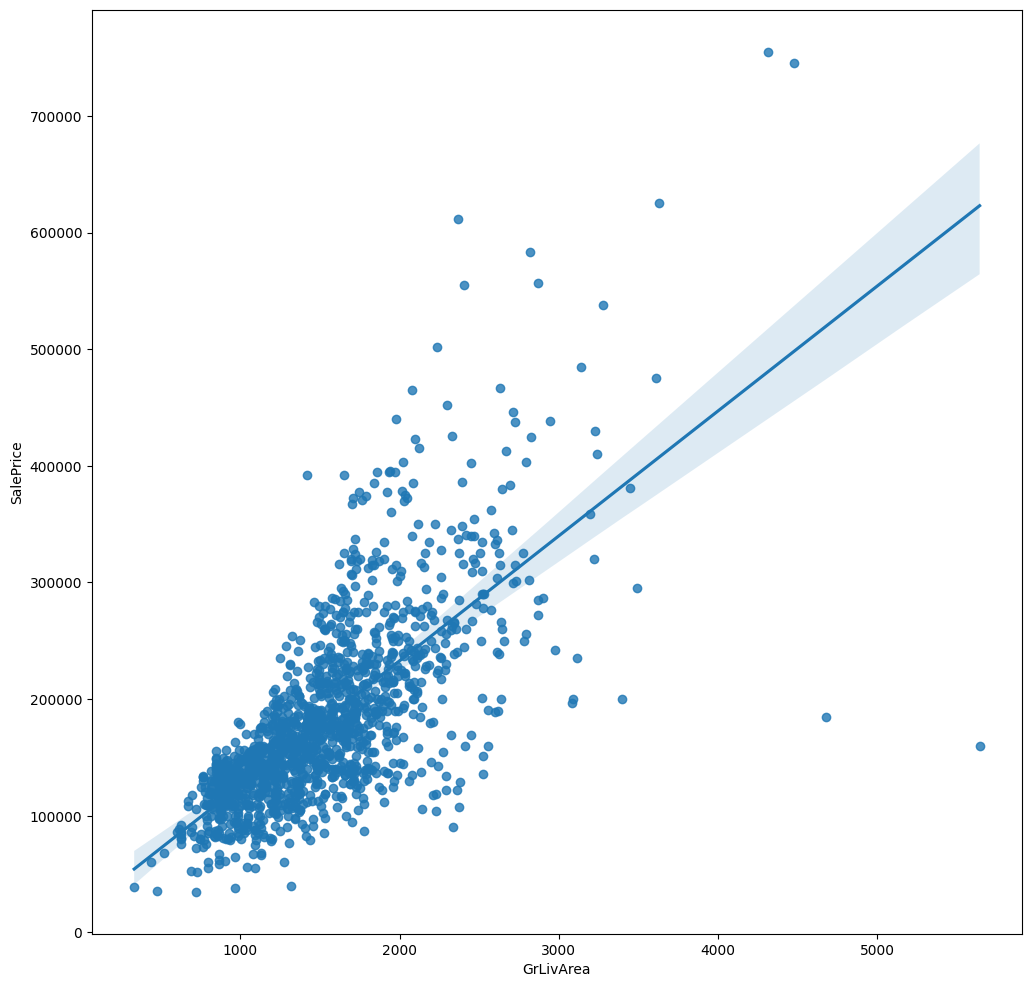

In [39]:
fig = plt.figure(figsize=(12, 12))
sns.regplot(data = df, x='GrLivArea', y='SalePrice')
plt.show()

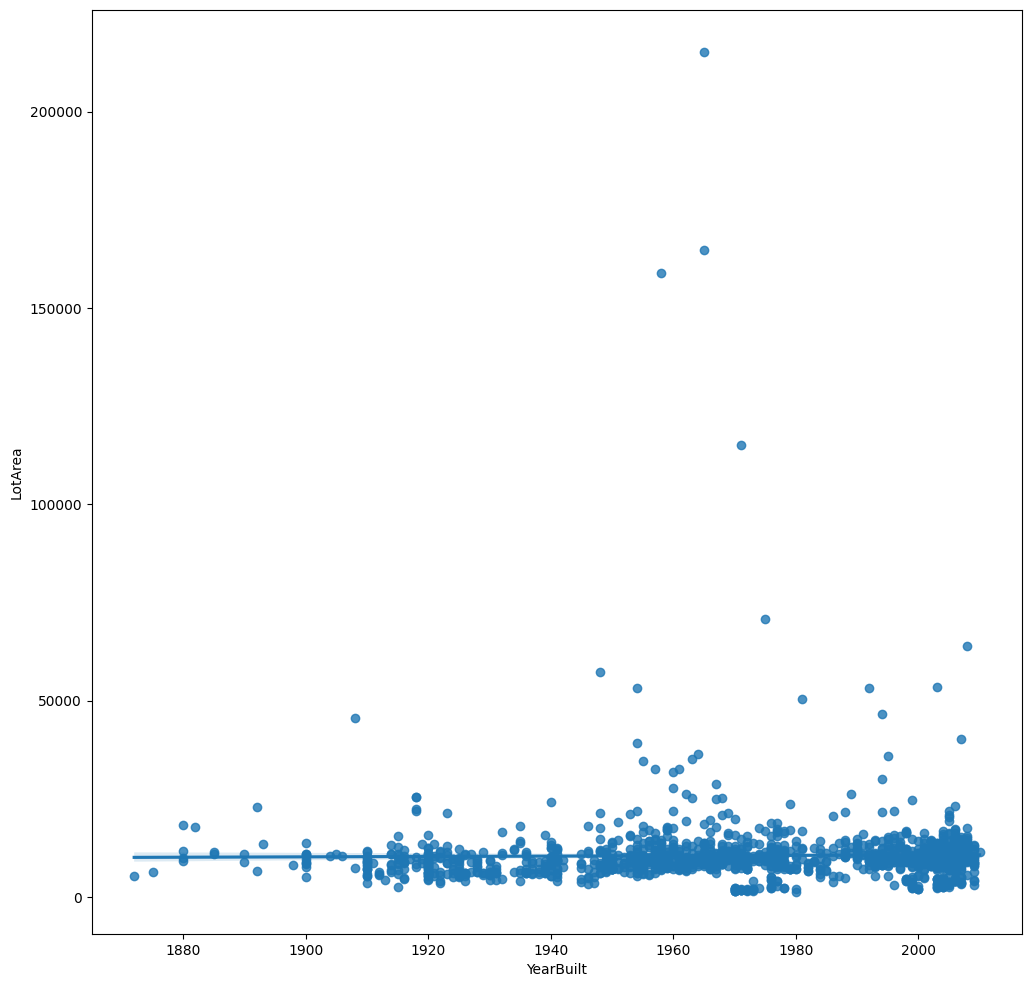

In [41]:
fig = plt.figure(figsize=(12, 12))
sns.regplot(data = df, x='YearBuilt', y='LotArea')
plt.show()

# ✅ Task (2p)
1. Create two filtered dataframes:
    * The first one *df_fam* will contain only the data for **BldgType** = '1Fam'
    * The second one *df_twn* will contain only the data for **BldgType** = 'Twnhs' or 'TwnhsE'

2. Plot two correlation matrices
    * 💡 One for each of the datasets and use these features:
    > ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

3. Do you see any differences or similarities in the correlation matrices?
    * Which features you take as correlated and which are not according to you?
    * **Describe the insight you got from the plots with a few sentences in a Markdown cell below the plot**
        * ❌ Plot interpretation figured in real-time during task check is not allowed! ❌